# TensorFlow II

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

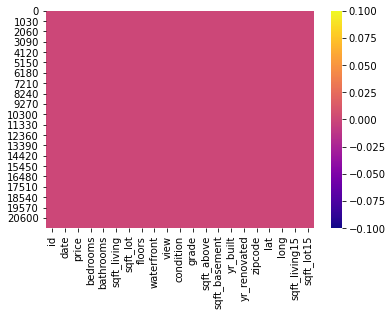

In [7]:
sns.heatmap(df.isnull(),cmap='plasma')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


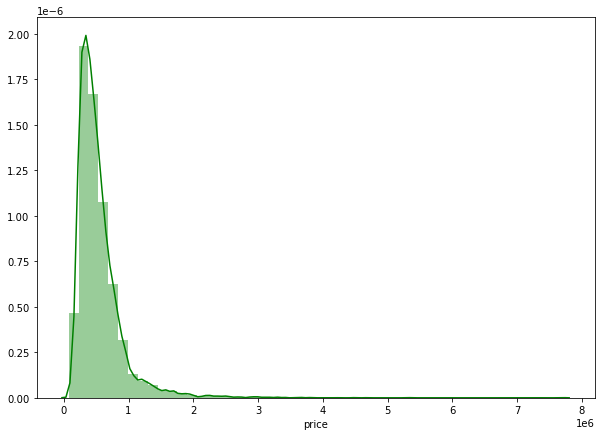

In [9]:
plt.figure(figsize=(10,7))
sns.distplot(df['price'],color='g')

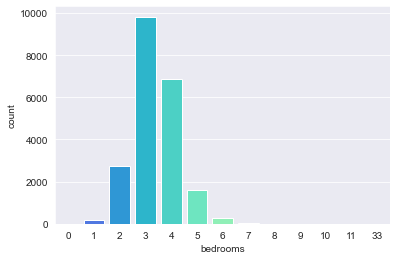

In [10]:
sns.set_style('darkgrid')
sns.countplot(df['bedrooms'],palette='rainbow')

In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

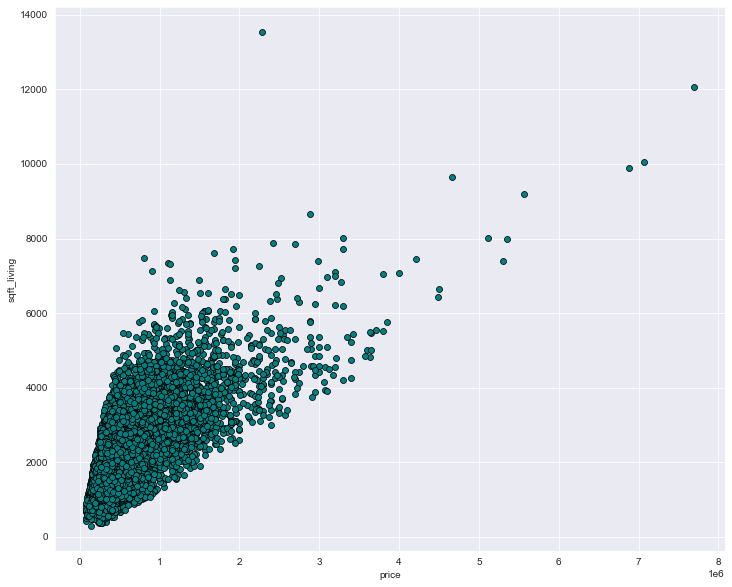

In [12]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='price',y='sqft_living',data=df,edgecolor='black',color='teal')

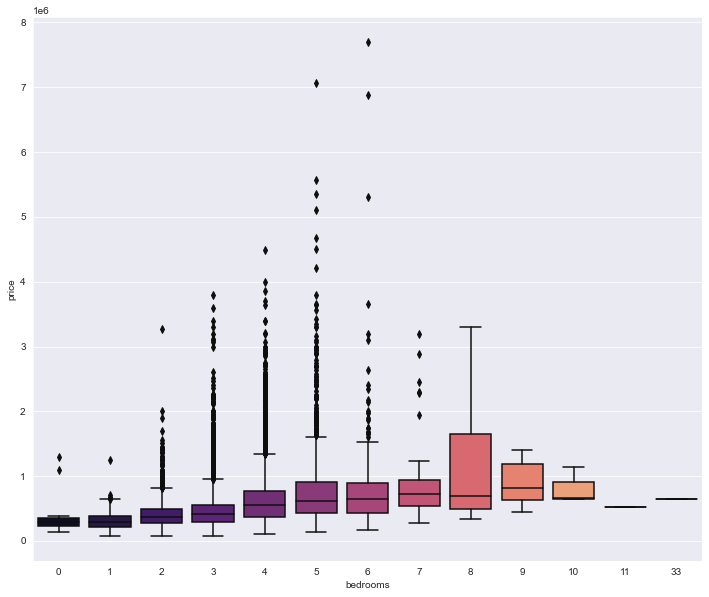

In [13]:
plt.figure(figsize=(12,10))
sns.boxplot(x='bedrooms',y='price',data=df,palette='magma')

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

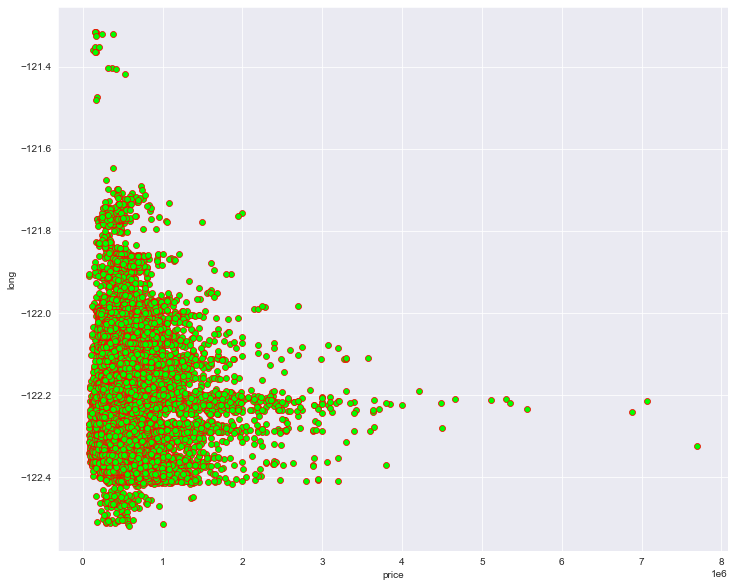

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='price',y='long',data=df,color='lime',edgecolor='red')

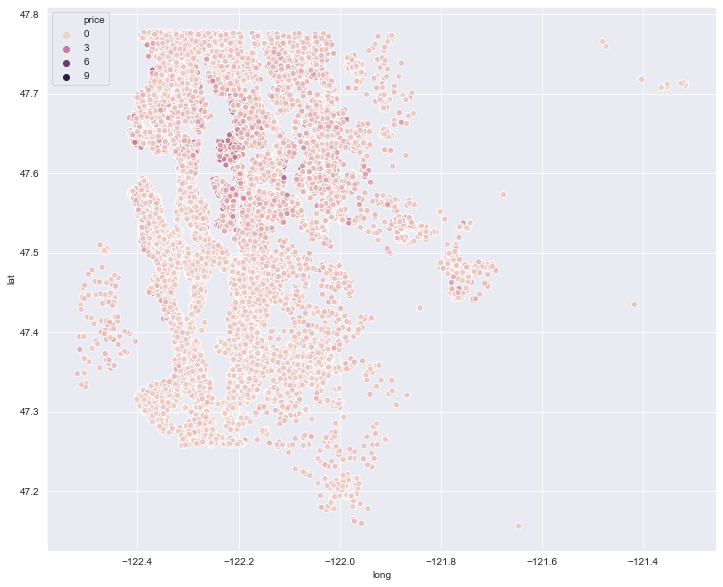

In [16]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='long',y='lat',data=df,color='orange',hue='price')

In [17]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [18]:
len(df)

21613

In [19]:
non_top_1_percent = df.sort_values('price',ascending=False).iloc[216:]

Text(0.5, 1.0, 'Washington : King County : Most expensive houses')

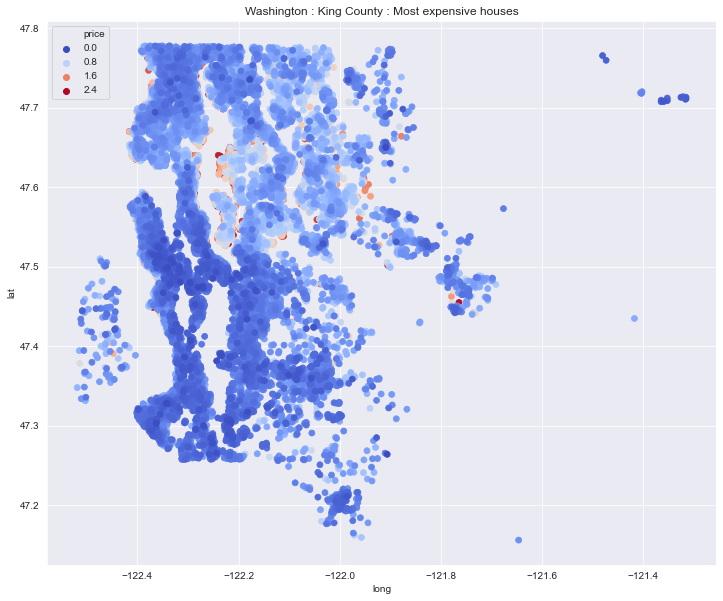

In [20]:
plt.figure(figsize=(12,10))

sns.scatterplot(x='long',y='lat',data=non_top_1_percent,color='orange',hue='price',edgecolor=None,palette='coolwarm').set_title('Washington : King County : Most expensive houses')


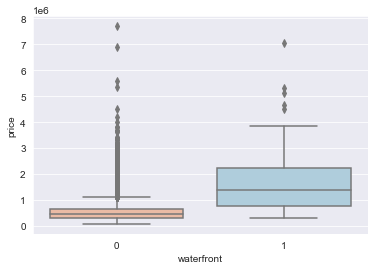

In [21]:
sns.boxplot(x='waterfront',y='price',data=df,palette='RdBu')

In [22]:
df = df.drop('id',axis=1)

In [23]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
df['date'] = pd.to_datetime(df['date'])

In [25]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [26]:
df['year'] = df['date'].apply(lambda date : date.year)

In [27]:
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: year, Length: 21613, dtype: int64

In [28]:
df['month'] = df['date'].apply(lambda date : date.month)

In [29]:
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21608     5
21609     2
21610     6
21611     1
21612    10
Name: month, Length: 21613, dtype: int64

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


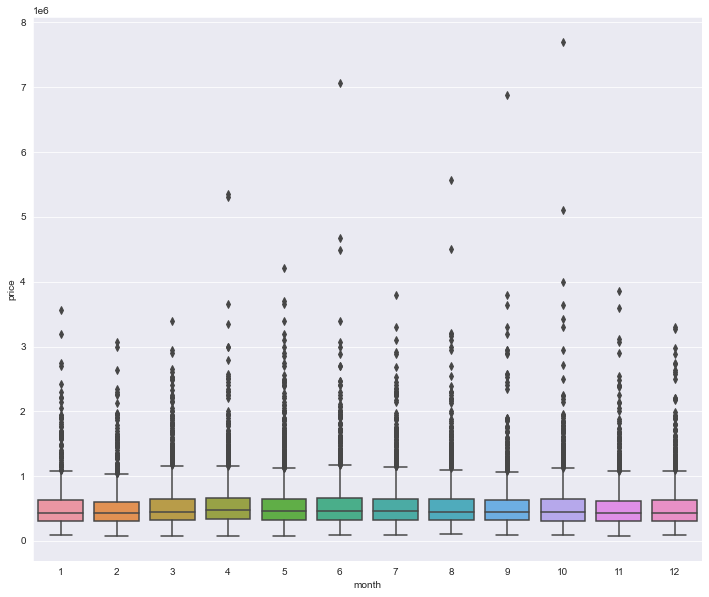

In [31]:
plt.figure(figsize=(12,10))
sns.boxplot(x='month',y='price',data=df)

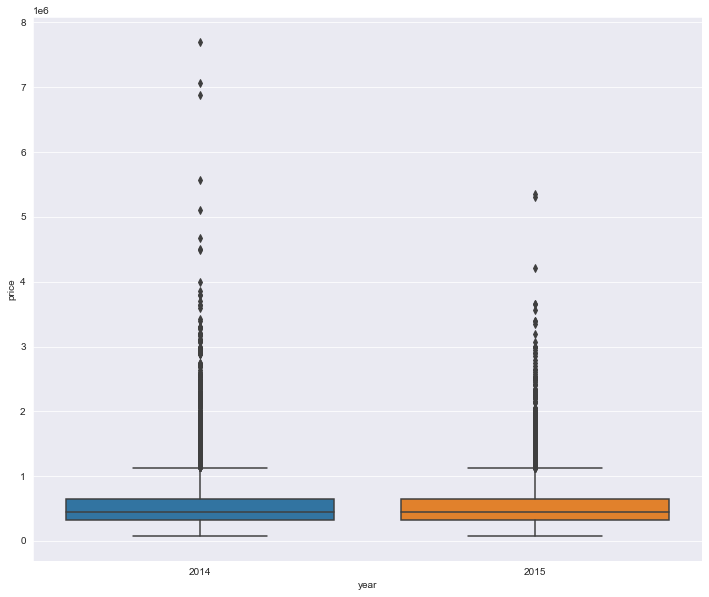

In [32]:
plt.figure(figsize=(12,10))
sns.boxplot(x='year',y='price',data=df)

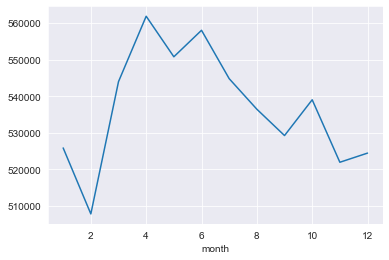

In [33]:
df.groupby('month').mean()['price'].plot()

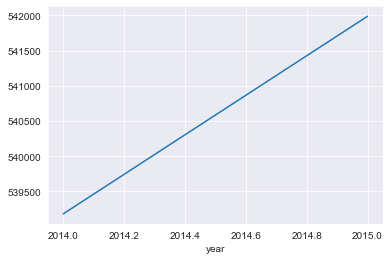

In [34]:
df.groupby('year').mean()['price'].plot()

In [35]:
df=df.drop('date',axis=1)

In [36]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [37]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [38]:
df=df.drop('zipcode',axis=1)

In [39]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [40]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [41]:
df['sqft_basement'].value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [42]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
X_train = scaler.fit_transform(X_train)

In [48]:
X_test = scaler.transform(X_test)

In [49]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [50]:
X_train.shape

(15129, 19)

In [51]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [52]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 5ms/step - loss: 423630962688.0000 - val_loss: 433042522112.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 423074988032.0000 - val_loss: 431079948288.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 415301959680.0000 - val_loss: 412752773120.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 374359883776.0000 - val_loss: 340468367360.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 266917855232.0000 - val_loss: 202900111360.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 142857551872.0000 - val_loss: 114014773248.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 101618409472.0000 - val_loss: 104299773952.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 98296381440.0000 - val_loss: 102800252928.0000
Epoch 9/400
119/1

119/119 [==============================] - 0s 3ms/step - loss: 40484712448.0000 - val_loss: 40278609920.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 40251670528.0000 - val_loss: 40032002048.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 40057290752.0000 - val_loss: 39814746112.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 39850598400.0000 - val_loss: 39614648320.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 39680868352.0000 - val_loss: 39392690176.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 39478890496.0000 - val_loss: 39180955648.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 39304372224.0000 - val_loss: 39011708928.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 39152738304.0000 - val_loss: 38863224832.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 33988368384.0000 - val_loss: 33382897664.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 34001778688.0000 - val_loss: 33345744896.0000
Epoch 137/400
119/119 [==============================] - 0s 4ms/step - loss: 33992030208.0000 - val_loss: 33340598272.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 33881448448.0000 - val_loss: 33269252096.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 33871804416.0000 - val_loss: 33266515968.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 33823811584.0000 - val_loss: 33219465216.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 33773080576.0000 - val_loss: 33164427264.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 33742059520.0000 - val_loss: 33178224640.0000
Epoch 143/400
11

119/119 [==============================] - 0s 4ms/step - loss: 32182720512.0000 - val_loss: 31551184896.0000
Epoch 202/400
119/119 [==============================] - 0s 4ms/step - loss: 32165574656.0000 - val_loss: 31537031168.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 32157767680.0000 - val_loss: 31536801792.0000
Epoch 204/400
119/119 [==============================] - 0s 4ms/step - loss: 32094896128.0000 - val_loss: 31502632960.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 32089624576.0000 - val_loss: 31618123776.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 32105809920.0000 - val_loss: 31466524672.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 32052760576.0000 - val_loss: 31437451264.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 31978170368.0000 - val_loss: 31547582464.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30997055488.0000 - val_loss: 30471931904.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 31013093376.0000 - val_loss: 30535114752.0000
Epoch 269/400
119/119 [==============================] - 0s 4ms/step - loss: 31032203264.0000 - val_loss: 30424350720.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 30959433728.0000 - val_loss: 30442678272.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30978850816.0000 - val_loss: 30414944256.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30926694400.0000 - val_loss: 30387322880.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30913478656.0000 - val_loss: 30413490176.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 30937221120.0000 - val_loss: 30362232832.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30081630208.0000 - val_loss: 29654718464.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 30098341888.0000 - val_loss: 29593843712.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 30087133184.0000 - val_loss: 29663254528.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 30067834880.0000 - val_loss: 29603966976.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 30049183744.0000 - val_loss: 29819822080.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 30021009408.0000 - val_loss: 29551269888.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 30012198912.0000 - val_loss: 29587861504.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 30017245184.0000 - val_loss: 29524826112.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29238941696.0000 - val_loss: 28803295232.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 29176723456.0000 - val_loss: 28747759616.0000


In [53]:
loss_df = pd.DataFrame(model.history.history)

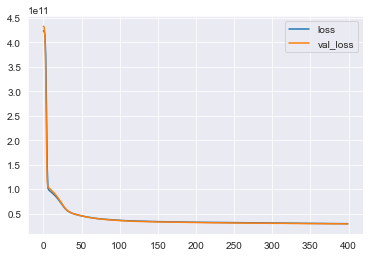

In [54]:
loss_df.plot()

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [56]:
predictions = model.predict(X_test)

In [57]:
mean_squared_error(y_test,predictions)**0.5

169551.64783985593

In [58]:
mean_absolute_error(y_test,predictions)

104933.34823339181

In [59]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [60]:
explained_variance_score(y_test,predictions)

0.7950648790404933

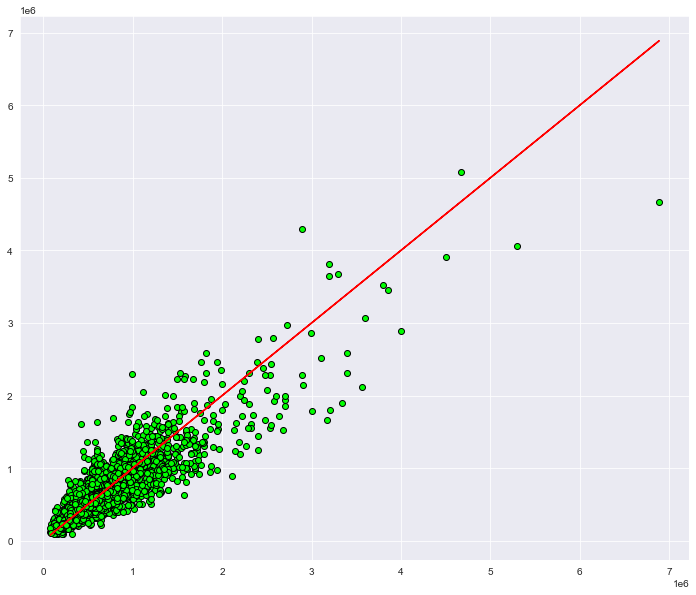

In [61]:
plt.figure(figsize=(12,10))
plt.scatter(y_test,predictions,edgecolor='black',color='lime')
plt.plot(y_test,y_test,'r')

In [62]:
single_house = df.drop('price',axis=1).iloc[0]

In [63]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [64]:
model.predict(single_house)

array([[282606.2]], dtype=float32)

In [65]:
print(f"Price of the new single house is predicted as :  ${model.predict(single_house)[0][0]} USD")

Price of the new single house is predicted as :  $282606.1875 USD


In [66]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
